In [113]:
# -*- coding: utf-8 -*-

import os
os.chdir('/home/zl/develop/projects/hbc')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time
import datetime
%matplotlib inline

In [114]:
### define some query functions
def plot_hist(x, bins=10):
    plt.hist(x, bins=bins)

def getTimespanWithHolidays(yday, yday_holi_list):
    if len(yday_holi_list) <= 0:
        return 100
    timespan2holi_min = 1000
    for i in range(len(yday_holi_list)):
        timespan2holi_tmp = np.abs(yday_holi_list[i] - yday)
        if timespan2holi_tmp < timespan2holi_min:
            timespan2holi_min = timespan2holi_tmp
    return timespan2holi_min

def getTimeFromTimestamp(timestamp):
    time_local = time.localtime(timestamp)
    tm_year = time_local.tm_year
    tm_mon = time_local.tm_mon
    tm_day = time_local.tm_mday
    tm_hour = time_local.tm_hour
    tm_min = time_local.tm_min
    tm_sec = time_local.tm_sec
    tm_wday = time_local.tm_wday
    tm_yday = time_local.tm_yday
    return tm_year, tm_mon, tm_day, tm_hour, tm_min, tm_sec, tm_wday, tm_yday

In [90]:
x_tags_filtered = pd.read_csv('./feature/x_tags3.csv', encoding='gb2312')
x_tags = ['userid', 'futureOrderType']
#x_tags = ['userid']
x_tags
x_tags.extend(list(x_tags_filtered['x_tag']))
x_tags

['userid',
 'histord_sum_all',
 'histord_sum_1',
 'histord_ratio1_0',
 'histord_time_last_1_month',
 'histord_time_last_1_hour',
 'histord_time_last_1_yday',
 'histord_sum_cont1',
 'histord_sum_cont2',
 'histord_sum_cont3',
 'histord_sum_cont4',
 'histord_sum_cont5',
 'action_sum',
 'actiontype_last_1',
 'actiontype_last_2',
 'actiontype_last_3',
 'actiontype_last_4',
 'actiontype_last_5',
 'actiontimespancount_1_5',
 'actiontimespancount_5_6',
 'actiontimespancount_6_7',
 'actiontimespancount_7_8',
 'actionratio_24_59',
 'actiontimespanlast_1_5',
 'actiontimespanlast_5_6',
 'actiontimespanlast_6_7',
 'actiontimespanlast_7_8',
 'actiontimespanlast_5_7',
 'actiontimespanlast_5_8',
 'action59seqentialratio',
 'actiontypeprop_1',
 'actiontypeprop_2',
 'actiontypeprop_3',
 'actiontypeprop_4',
 'actiontypeprop_5',
 'actiontypeprop_6',
 'actiontypeprop_7',
 'actiontypeprop_8',
 'actiontypeprop_9',
 'actiontypeproplast10_1',
 'actiontypeproplast10_2',
 'actiontypeproplast10_3',
 'actiontypepr

In [115]:
df = pd.read_csv('./result/data_train.csv')
#df = pd.read_csv('./result/data_test.csv')

In [92]:
df = df[x_tags]

In [116]:
print(df.shape)
df.head()

(40307, 514)


,userid,futureOrderType,histord_sum_all,histord_sum_0,histord_sum_1,histord_ratio1_0,histord_time_last_1,histord_time_last_1_year,histord_time_last_1_month,histord_time_last_1_hour,...,timespan2last_action6_indicator1,timespan2last_action7_indicator1,timespan2last_action8_indicator1,timespan2last_action9_indicator1,timespan2last_action1_indicator2,timespan2last_action5_indicator2,timespan2last_action6_indicator2,timespan2last_action7_indicator2,timespan2last_action8_indicator2,timespan2last_action9_indicator2
0,100000000013,0,2.0,2.0,0.0,0.333333,1.501960e+09,2017.0,8.0,3.0,...,0.000000e+00,5.195326e+09,5.508683e+09,5.853648e+09,0.000000e+00,1.316626e+11,0.000000e+00,1.194925e+11,1.211910e+11,1.229266e+11
1,100000000111,0,0.0,0.0,0.0,1.000000,NaN,NaN,NaN,NaN,...,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN
2,100000000127,0,0.0,0.0,0.0,1.000000,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,NaN,NaN,1.174871e+13,1.758036e+12,NaN,0.000000e+00,NaN,NaN
3,100000000231,0,0.0,0.0,0.0,1.000000,NaN,NaN,NaN,NaN,...,1.507874e+07,NaN,NaN,NaN,1.500000e+03,4.162842e+07,4.523623e+07,NaN,NaN,NaN
4,100000000379,0,0.0,0.0,0.0,1.000000,NaN,NaN,NaN,NaN,...,0.000000e+00,1.426621e+11,NaN,NaN,0.000000e+00,2.947689e+10,0.000000e+00,5.421159e+12,NaN,NaN


In [117]:
df.describe()

,userid,futureOrderType,histord_sum_all,histord_sum_0,histord_sum_1,histord_ratio1_0,histord_time_last_1,histord_time_last_1_year,histord_time_last_1_month,histord_time_last_1_hour,...,timespan2last_action6_indicator1,timespan2last_action7_indicator1,timespan2last_action8_indicator1,timespan2last_action9_indicator1,timespan2last_action1_indicator2,timespan2last_action5_indicator2,timespan2last_action6_indicator2,timespan2last_action7_indicator2,timespan2last_action8_indicator2,timespan2last_action9_indicator2
count,4.030700e+04,40307.000000,40307.000000,40307.000000,40307.000000,40307.000000,1.063700e+04,10637.000000,10637.000000,10637.000000,...,3.582500e+04,1.572100e+04,1.203000e+04,8.872000e+03,3.243300e+04,3.763600e+04,3.582500e+04,1.572100e+04,1.203000e+04,8.872000e+03
mean,1.119145e+11,0.164364,0.512392,0.433771,0.078622,0.910081,1.494260e+09,2016.915202,5.772304,11.703864,...,4.366713e+11,2.241092e+10,1.155897e+12,1.039546e+12,5.574525e+11,1.786305e+12,2.559248e+12,2.033767e+11,1.022545e+13,9.621168e+12
std,1.869774e+09,0.370610,1.343819,1.126209,0.513738,0.410001,6.227617e+06,0.278594,2.478120,7.930767,...,3.961762e+12,2.246172e+11,5.967284e+12,6.127462e+12,7.969058e+12,1.451887e+13,1.623355e+13,1.234249e+12,2.891073e+13,2.891632e+13
min,1.000000e+11,0.000000,0.000000,0.000000,0.000000,0.043478,1.478364e+09,2016.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.109180e+11,0.000000,0.000000,0.000000,0.000000,1.000000,1.491593e+09,2017.000000,4.000000,4.000000,...,0.000000e+00,0.000000e+00,1.001190e+09,9.451862e+08,9.605930e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.465976e+10,1.477726e+10
50%,1.114490e+11,0.000000,0.000000,0.000000,0.000000,1.000000,1.495115e+09,2017.000000,5.000000,12.000000,...,0.000000e+00,0.000000e+00,8.934062e+09,7.583574e+09,2.090182e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.467090e+11,1.283815e+11
75%,1.126073e+11,0.000000,1.000000,0.000000,0.000000,1.000000,1.498599e+09,2017.000000,7.000000,19.000000,...,0.000000e+00,5.437371e+02,1.589672e+11,1.194053e+11,2.474683e+05,3.023431e+04,0.000000e+00,1.631211e+03,3.109619e+12,2.144130e+12
max,1.149998e+11,1.000000,67.000000,44.000000,23.000000,17.000000,1.505137e+09,2017.000000,12.000000,23.000000,...,2.072140e+14,8.694950e+12,1.805489e+14,2.148025e+14,3.653934e+14,3.909421e+14,4.144279e+14,4.134734e+13,3.610978e+14,4.296051e+14


In [118]:
df.columns.tolist()

['userid',
 'futureOrderType',
 'histord_sum_all',
 'histord_sum_0',
 'histord_sum_1',
 'histord_ratio1_0',
 'histord_time_last_1',
 'histord_time_last_1_year',
 'histord_time_last_1_month',
 'histord_time_last_1_hour',
 'histord_time_last_1_yday',
 'histord_time_last_2',
 'histord_time_last_2_year',
 'histord_time_last_2_month',
 'histord_time_last_2_hour',
 'histord_time_last_2_yday',
 'histord_time_last_3',
 'histord_time_last_3_year',
 'histord_time_last_3_month',
 'histord_time_last_3_hour',
 'histord_time_last_3_yday',
 'histord_sum_cont1',
 'histord_sum_cont2',
 'histord_sum_cont3',
 'histord_sum_cont4',
 'histord_sum_cont5',
 '印度尼西亚',
 '丹麦',
 '斐济',
 '中国澳门',
 '卡塔尔',
 '缅甸',
 '澳大利亚',
 '中国台湾',
 '新西兰',
 '英国',
 '比利时',
 '菲律宾',
 '匈牙利',
 '瑞典',
 '爱尔兰',
 '柬埔寨',
 '西班牙',
 '冰岛',
 '中国香港',
 '马来西亚',
 '墨西哥',
 '越南',
 '奥地利',
 '捷克',
 '芬兰',
 '尼泊尔',
 '毛里求斯',
 '瑞士',
 '挪威',
 '埃及',
 '德国',
 '日本',
 '巴西',
 '南非',
 '法国',
 '希腊',
 '韩国',
 '美国',
 '葡萄牙',
 '阿联酋',
 '意大利',
 '摩洛哥',
 '波兰',
 '土耳其',
 '新加坡',
 '老挝',
 '加拿大

In [4]:
for index, name in enumerate(df.columns.tolist()):
    print(index, '-', name)

0 - userid
1 - futureOrderType
2 - histord_sum_all
3 - histord_sum_0
4 - histord_sum_1
5 - histord_ratio1_0
6 - histord_time_last_1
7 - histord_time_last_1_year
8 - histord_time_last_1_month
9 - histord_time_last_1_hour
10 - histord_time_last_1_yday
11 - histord_time_last_2
12 - histord_time_last_2_year
13 - histord_time_last_2_month
14 - histord_time_last_2_hour
15 - histord_time_last_2_yday
16 - histord_time_last_3
17 - histord_time_last_3_year
18 - histord_time_last_3_month
19 - histord_time_last_3_hour
20 - histord_time_last_3_yday
21 - histord_sum_cont1
22 - histord_sum_cont2
23 - histord_sum_cont3
24 - histord_sum_cont4
25 - histord_sum_cont5
26 - 美国
27 - 韩国
28 - 尼泊尔
29 - 波兰
30 - 越南
31 - 澳大利亚
32 - 挪威
33 - 葡萄牙
34 - 英国
35 - 柬埔寨
36 - 捷克
37 - 中国
38 - 印度尼西亚
39 - 巴西
40 - 埃及
41 - 加拿大
42 - 阿联酋
43 - 西班牙
44 - 新加坡
45 - 南非
46 - 日本
47 - 斐济
48 - 菲律宾
49 - 荷兰
50 - 法国
51 - 马来西亚
52 - 希腊
53 - 丹麦
54 - 缅甸
55 - 卡塔尔
56 - 比利时
57 - 泰国
58 - 瑞典
59 - 中国台湾
60 - 瑞士
61 - 土耳其
62 - 老挝
63 - 爱尔兰
64 - 中国香港
65 - 俄罗斯

In [20]:
df0 = df[df['futureOrderType'] == 0]
df1 = df[df['futureOrderType'] == 1]

np.sum(df.iloc[:,26:77])
#[np.sum(df0.iloc[:,26:76]), np.sum(df1.iloc[:,26:76])]

美国       3029
韩国        448
尼泊尔         2
波兰          3
越南        138
澳大利亚     2425
挪威          4
葡萄牙        22
英国        726
柬埔寨        42
捷克         34
中国          1
印度尼西亚     454
巴西          1
埃及          6
加拿大       402
阿联酋       112
西班牙       214
新加坡      1937
南非          3
日本       3509
斐济         22
菲律宾         6
荷兰         47
法国        754
马来西亚     1431
希腊         44
丹麦         13
缅甸          7
卡塔尔         1
比利时        12
泰国       1556
瑞典         26
中国台湾     1348
瑞士         29
土耳其         5
老挝          6
爱尔兰         9
中国香港     1033
俄罗斯        73
德国         98
芬兰         22
墨西哥         1
奥地利        29
匈牙利        14
新西兰       181
意大利       348
毛里求斯        1
摩洛哥         1
中国澳门       23
dtype: int64

In [42]:
ix = (np.sum(df1.iloc[:,26:77])+1) / (np.sum(df0.iloc[:,26:77])+1)
ix.sort_values(ascending=False)
#( (np.sum(df1.iloc[:,26:76])+1) / (np.sum(df0.iloc[:,26:76])+1) > 1.0 ) & ( np.sum(df.iloc[:,26:76]) > 10 )

土耳其      6.000000
捷克       4.142857
波兰       4.000000
比利时      3.666667
奥地利      3.428571
俄罗斯      3.411765
匈牙利      3.000000
尼泊尔      3.000000
瑞士       2.875000
荷兰       2.500000
巴西       2.000000
丹麦       2.000000
缅甸       2.000000
冰岛       2.000000
毛里求斯     2.000000
墨西哥      2.000000
希腊       1.875000
葡萄牙      1.400000
阿联酋      1.375000
瑞典       1.333333
德国       1.325581
芬兰       1.181818
印度尼西亚    1.150943
意大利      1.134146
西班牙      1.037736
埃及       1.000000
挪威       1.000000
日本       0.920678
韩国       0.691729
南非       0.666667
法国       0.657895
加拿大      0.655738
英国       0.635955
老挝       0.600000
中国台湾     0.593861
爱尔兰      0.571429
柬埔寨      0.517241
卡塔尔      0.500000
摩洛哥      0.500000
中国       0.500000
美国       0.486513
泰国       0.478178
中国澳门     0.470588
新西兰      0.407692
澳大利亚     0.375071
越南       0.346154
菲律宾      0.333333
马来西亚     0.287511
新加坡      0.161774
中国香港     0.155134
斐济       0.090909
dtype: float64

In [41]:
df0 = df[df['futureOrderType'] == 0]
df1 = df[df['futureOrderType'] == 1]
print(np.sum(df.iloc[:,77:282]).sort_values(ascending=False))

新加坡.1           1937
东京              1889
纽约              1127
台北              1107
吉隆坡             1076
悉尼              1035
香港              1033
大阪              1016
墨尔本              821
曼谷               819
巴黎               680
伦敦               672
洛杉矶              618
巴厘岛              453
普吉岛              365
首尔               340
旧金山              293
清迈               259
京都               216
布里斯班             209
北海道--札幌          197
波士顿              189
温哥华              188
黄金海岸             174
罗马               155
沙巴--亚庇           153
奥克兰              150
华盛顿              143
米兰               135
多伦多              130
                ... 
贝尔法斯特              1
拉科鲁尼亚              1
格拉纳达               1
考文垂                1
富山市                1
惠灵顿                1
成田市                1
牛津                 1
上海                 1
毛里求斯.1             1
雷克雅未克              1
波尔图                1
多哈                 1
墨西哥城               1
云顶高原               1
御殿场市               1
戛纳           

In [73]:
col_city = np.arange(77,282,1)
ix = np.sum(df.iloc[:,col_city]) > 10
col_city = col_city[ix]

In [74]:
ix = (np.sum(df1.iloc[:,col_city])+1) / (np.sum(df.iloc[:,col_city])+1)
ix.sort_values(ascending=False)

垦丁         1.000000
花莲         0.955224
圣彼得堡       0.900000
布鲁塞尔       0.846154
布拉格        0.828571
底特律        0.823529
布达佩斯       0.800000
维也纳        0.785714
济州岛        0.760000
佛罗伦萨       0.742857
卡尔加里       0.740741
苏黎世        0.736842
阿姆斯特丹      0.729167
莫斯科        0.720930
哥本哈根       0.714286
丹佛         0.705882
慕尼黑        0.680000
京都         0.668203
雅典         0.666667
爱丁堡        0.652174
北海道--札幌    0.636364
马德里        0.626667
阿布扎比       0.590909
里斯本        0.590909
杜塞尔多夫      0.583333
迪拜         0.582418
斯德哥尔摩      0.576923
米兰         0.573529
赫尔辛基       0.565217
冲绳--那霸     0.564103
             ...   
台北         0.302347
波士顿        0.300000
首尔         0.299120
墨尔本        0.298054
胡志明市       0.288462
名古屋        0.288136
布里斯班       0.285714
悉尼         0.270270
甲米         0.263158
纽约         0.259752
芽庄         0.250000
巴尔的摩       0.250000
吉隆坡        0.246054
凯恩斯        0.241071
奥克兰        0.238411
珀斯         0.233333
河内         0.214286
黄金海岸       0.211429
奥兰多        0.205882


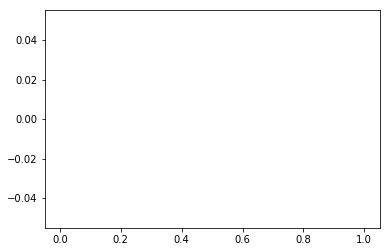

In [72]:
plot_hist(df0.loc[df0['垦丁']>0, '垦丁'], 30)
#plot_hist(df1.loc[df1['垦丁']>0, '垦丁'], 30)

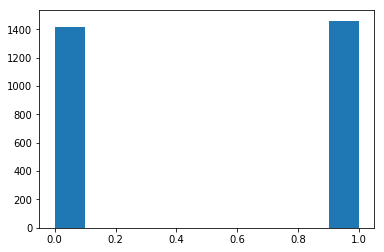

In [19]:
#plot_hist(df.loc[df['ord_last_1_type']>=0, 'ord_last_1_type'])
plot_hist(df1.loc[df1['ord_last_1_type']>=0, 'ord_last_1_type'])

In [ ]:
plot_hist(np.power(df['histord_sum_all'], 0.5), bins=100)

In [76]:
col_province = np.arange(395,426,1)
ix = (np.sum(df1.iloc[:,col_province])+1) / (np.sum(df.iloc[:,col_province])+1)
ix.sort_values(ascending=False)

31

## 填充空值

In [94]:
x_tags_fill_neg1 = pd.read_csv('./feature/x_tags_fill-1.csv')
x_tags_fill_neg1 = list(x_tags_fill_neg1['x_tag'])
x_tags_fill_neg1
#df = df[x_tags]

['histord_time_last_1_month',
 'histord_time_last_1_hour',
 'histord_time_last_1_yday',
 'actiontimespanlast_1_5',
 'actiontimespanlast_5_6',
 'actiontimespanlast_6_7',
 'actiontimespanlast_7_8',
 'actiontimespanlast_5_7',
 'actiontimespanlast_5_8',
 'actiontimespan_mean_1_5',
 'actiontimespan_mean_5_9',
 'actiontimespan_mean_1_9',
 'timespan_action_lastord',
 'timespan_action1tolast',
 'timespan_action5tolast',
 'timespan_action6tolast',
 'timespan_action7tolast',
 'timespan_action8tolast',
 'timespan_action9tolast',
 'timespan_lastord_1_2',
 'timespan_last_1',
 'timespan_last_2',
 'timespan_last_3',
 'timespan_last_4',
 'timespan_last_5',
 'timespan_last_6',
 'timespan_last_7',
 'timespanmean_last_3',
 'timespanmin_last_3',
 'timespanmax_last_3',
 'timespanstd_last_3',
 'timespanmean_last_6',
 'timespanmin_last_6',
 'timespanmax_last_6',
 'timespanstd_last_6',
 'timespan_total',
 'timespan_action_lastordtype1',
 'timespan_lastordtype1_1_2',
 'actiontime_last_1_month',
 'actiontime_la

In [104]:
df = df.fillna(-999)

In [95]:
for i in range(len(x_tags_fill_neg1)):
    df[x_tags_fill_neg1[i]] = df[x_tags_fill_neg1[i]].fillna(-999)

In [105]:
df.head()

,userid,futureOrderType,histord_sum_all,histord_sum_0,histord_sum_1,histord_ratio1_0,histord_time_last_1,histord_time_last_1_year,histord_time_last_1_month,histord_time_last_1_hour,...,timespan_action_lastordtype1,timespan_lastordtype1_1_2,timespan_lastord_lastordtype1,actiontime_last_1_hour,actiontime_last_1_yday,actiontime_last_1_timespan2holi,histord_time_ordtype1_last_1_month,histord_time_ordtype1_last_1_hour,histord_time_ordtype1_last_1_yday,histord_time_ordtype1_last_1_timespan2holi
0,100000000013,0,2.0,2.0,0.0,0.333333,1.501960e+09,2017.0,8.0,3.0,...,-999.0,-999.0,-999.0,22.0,232.0,50.0,-999.0,-999.0,-999.0,-999.0
1,100000000111,0,0.0,0.0,0.0,1.000000,-9.990000e+02,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,22.0,90.0,31.0,-999.0,-999.0,-999.0,-999.0
2,100000000127,0,0.0,0.0,0.0,1.000000,-9.990000e+02,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,3.0,170.0,12.0,-999.0,-999.0,-999.0,-999.0
3,100000000231,0,0.0,0.0,0.0,1.000000,-9.990000e+02,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,20.0,158.0,24.0,-999.0,-999.0,-999.0,-999.0
4,100000000379,0,0.0,0.0,0.0,1.000000,-9.990000e+02,-999.0,-999.0,-999.0,...,-999.0,-999.0,-999.0,19.0,251.0,69.0,-999.0,-999.0,-999.0,-999.0


In [ ]:
# 查看剩余未填充空值的属性名称
x_tags_other = [x for x in x_tags if x not in x_tags_fill_neg1]
x_tags_other

In [106]:
print(len(df[df.notnull()]))
print(len(df))

40307
40307


In [98]:
#write out transformed data
#pd.DataFrame(df).to_csv('./result/data_train_m.csv', header=True, index=False)
pd.DataFrame(df).to_csv('./result/data_test_m.csv', header=True, index=False)

In [112]:
#temp = pd.crosstab([df.actionratio_24_59, df.action59seqentialratio], df.futureOrderType.astype(bool))
#temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [ ]:
plot_hist(df.loc[df['histord_time_last_1_month']>0, 'histord_time_last_1_month'], bins=12)
np.sum(np.isnan(df['histord_time_last_1_month']))
df['histord_time_last_1_month'] = df['histord_time_last_1_month'].fillna(-1)

In [ ]:
plot_hist(df.loc[df['timespan_last_1'] >=0, 'timespan_last_1'])
np.sum(df['timespan_last_1'] > 0)

In [ ]:
# 提取y=1 or 0的数据
df_0 = df[df['futureOrderType'] == 0]
df_1 = df[df['futureOrderType'] == 1]
print(df_0.shape)
print(df_1.shape)

In [ ]:
plt.hist(df_0['actiontime_last_1_hour'])
plt.hist(df_1['actiontime_last_1_hour'])

In [ ]:
plot_hist(df_0['actiontime_last_1_timespan2holi'])
plot_hist(df_1['actiontime_last_1_timespan2holi'])

In [ ]:
np.sum(df['actiontimespanlast_5_6'] > 400)

In [ ]:
df.loc[df['actiontimespanlast_5_6'] > 400, 'actiontimespanlast_5_6'] = 401
plot_hist(df['actiontimespanlast_5_6'], bins=100)
df['actiontimespanlast_5_6_abnormal'] = 0
df.loc[df['actiontimespanlast_5_6'] > 400, 'actiontimespanlast_5_6_abnormal'] = 1

In [ ]:
df_0 = df[df['futureOrderType'] == 0]
df_1 = df[df['futureOrderType'] == 1]
plot_hist(df_0['actiontimespanlast_5_6'], bins=100)
plot_hist(df_1['actiontimespanlast_5_6'], bins=100)

In [ ]:
df.loc[df['timespan_action5tolast'] > 600, 'timespan_action5tolast'] = 601
df_0 = df[df['futureOrderType'] == 0]
df_1 = df[df['futureOrderType'] == 1]
plot_hist(df_0['timespan_action5tolast'], 100)
plot_hist(df_1['timespan_action5tolast'], 100)
df['timespan_action5tolast_abnormal'] = 0
df.loc[df['timespan_action5tolast'] > 600, 'timespan_action5tolast_abnormal'] = 1

In [ ]:
np.sum(df['timespan_action_lastord'] > 5000)

In [ ]:
df.loc[df['timespan_action_lastord'] > 2500, 'timespan_action_lastord'] = 2501
df[df['timespan_action_lastord'] < 0] = 0
df_0 = df[df['futureOrderType'] == 0]
df_1 = df[df['futureOrderType'] == 1]
plot_hist(df_0['timespan_action_lastord'], 20)
plot_hist(df_1['timespan_action_lastord'], 20)
df['timespan_action_lastord_abnormal'] = 0
df.loc[df['timespan_action_lastord'] > 2500, 'timespan_action_lastord_abnormal'] = 1

In [ ]:
np.sum(df['timespan_last_1'] > 3000)

In [ ]:
df.loc[df['timespan_last_1'] > 500, 'timespan_last_1'] = 501
df_0 = df[df['futureOrderType'] == 0]
df_1 = df[df['futureOrderType'] == 1]
plot_hist(df_0['timespan_last_1'], 30)
plot_hist(df_1['timespan_last_1'], 30)
df['timespan_last_1_abnormal'] = 0
df.loc[df['timespan_last_1'] > 500, 'timespan_last_1_abnormal'] = 1

In [ ]:
np.sum(df['timespan_action1tolast'] > 6000)

In [ ]:
df.loc[df['timespan_action1tolast'] > 6000, 'timespan_action1tolast'] = 6001
df_0 = df[df['futureOrderType'] == 0]
df_1 = df[df['futureOrderType'] == 1]
plot_hist(df_0['timespan_action1tolast'], 30)
plot_hist(df_1['timespan_action1tolast'], 30)
df['timespan_action1tolast_abnormal'] = 0
df.loc[df['timespan_action1tolast'] > 6000, 'timespan_action1tolast_abnormal'] = 1

In [ ]:
np.sum(df['timespan_last_2'] >= 2000)

In [ ]:
df.loc[df['timespan_last_2'] > 600, 'timespan_last_2'] = 601
df_0 = df[df['futureOrderType'] == 0]
df_1 = df[df['futureOrderType'] == 1]
plot_hist(df_0['timespan_last_2'], 30)
plot_hist(df_1['timespan_last_2'], 30)
df['timespan_last_2_abnormal'] = 0
df.loc[df['timespan_last_2'] > 600, 'timespan_last_2_abnormal'] = 1

In [ ]:
np.sum(df['timespan_action24tolast'] > 700)

In [ ]:
df.loc[df['timespan_action24tolast'] > 700, 'timespan_action24tolast'] = 701
df_0 = df[df['futureOrderType'] == 0]
df_1 = df[df['futureOrderType'] == 1]
plot_hist(df_0['timespan_action24tolast'], 30)
plot_hist(df_1['timespan_action24tolast'], 30)
df['timespan_action24tolast_abnormal'] = 0
df.loc[df['timespan_action24tolast'] > 700, 'timespan_action24tolast_abnormal'] = 1

In [ ]:
plot_hist(df['timespan_action24tolast_abnormal'])

In [ ]:
df.head()

In [ ]:
#write out transformed data
pd.DataFrame(df).to_csv('./result/data_train_m.csv', header=True, index=False)
#pd.DataFrame(df).to_csv('./result/data_test_m.csv', header=True, index=False)